<a href="https://colab.research.google.com/github/Shikha098/python-assignment/blob/main/Tableau_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Google Sheets Dataset

In [ ]:
import pandas as pd

url = "https://docs.google.com/spreadsheets/d/1TOVOoYEApB-Va75sqnIFfRNpFNOYInZhzS63RgpxND8/export?format=csv"
df = pd.read_csv(url)
df.head()

,Series ID,Title,Genre,Platform,Seasons,Episodes,IMDB Rating,Year
0,201,Sacred Games,Crime,Zee5,2,8,8.8,2021
1,202,Mirzapur,Drama,Zee5,1,12,6.5,2022
2,203,The Family Man,Sci-Fi,Zee5,1,13,6.8,2022
3,204,Paatal Lok,Drama,Voot,1,13,7.9,2022
4,205,Asur,Sci-Fi,SonyLIV,2,14,7.1,2019


Task 1: Web Series Released Per Year (Line Chart)

In [ ]:
print(df.columns.tolist())


['Series ID', 'Title', 'Genre', 'Platform', 'Seasons', 'Episodes', 'IMDB Rating', 'Year']


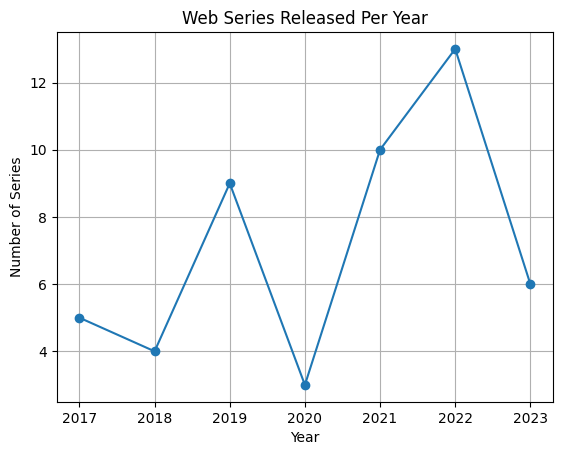

In [ ]:
# Remove extra spaces from column names
df.columns = df.columns.str.strip()

# Now run the chart code
df['Year'] = df['Year'].astype(int)
year_count = df['Year'].value_counts().sort_index()

import matplotlib.pyplot as plt

plt.plot(year_count.index, year_count.values, marker='o')
plt.title('Web Series Released Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Series')
plt.grid(True)
plt.show()

Task 2 : IMDB Ratings by Platform (Box Plot)

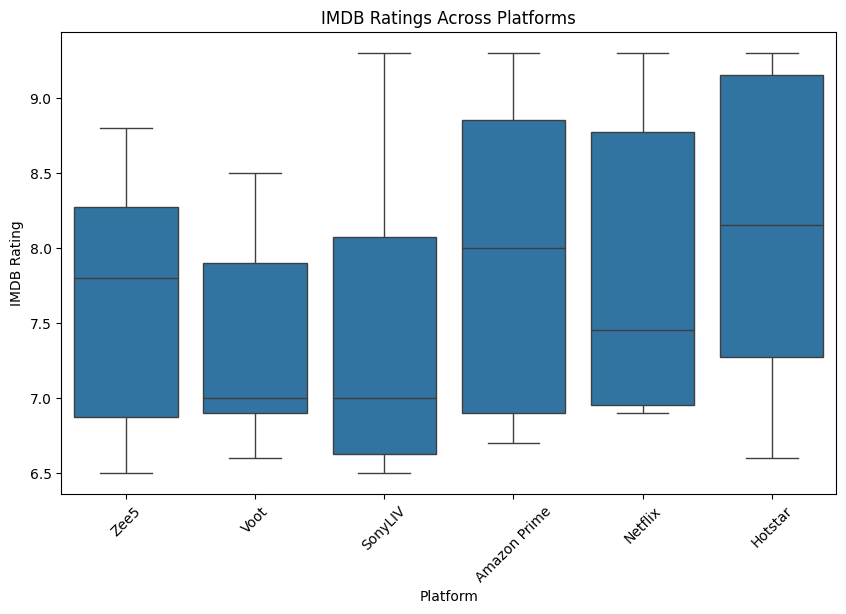

In [ ]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.boxplot(x='Platform', y='IMDB Rating', data=df)
plt.title('IMDB Ratings Across Platforms')
plt.xticks(rotation=45)
plt.show()

Task 3 : Top 5 Highest Rated Series (Horizontal Bar Chart)

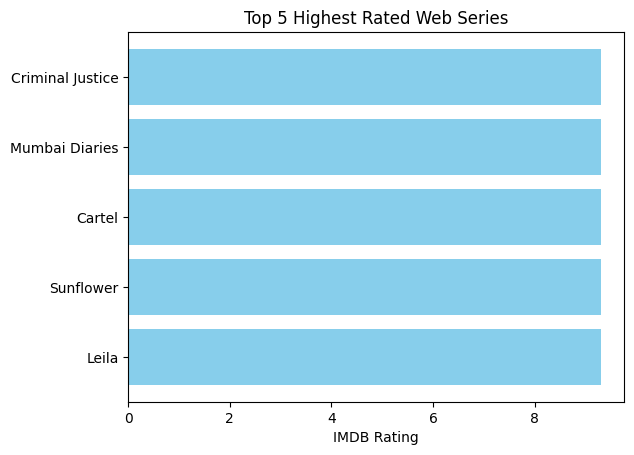

In [ ]:
top5 = df.sort_values(by='IMDB Rating', ascending=False).head(5)
plt.barh(top5['Title'], top5['IMDB Rating'], color='skyblue')
plt.xlabel('IMDB Rating')
plt.title('Top 5 Highest Rated Web Series')
plt.gca().invert_yaxis()
plt.show()

Task 4 : Genre Distribution (Bar Chart)

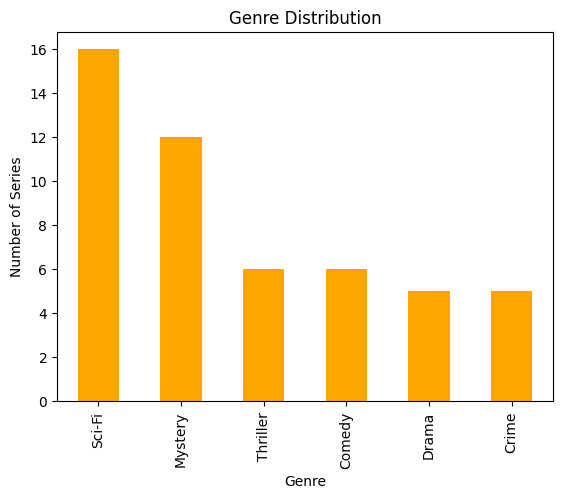

In [ ]:
genre_count = df['Genre'].value_counts()
genre_count.plot(kind='bar', color='orange')
plt.title('Genre Distribution')
plt.ylabel('Number of Series')
plt.show()

Task 5 : Episodes vs IMDB Rating (Scatter Plot)

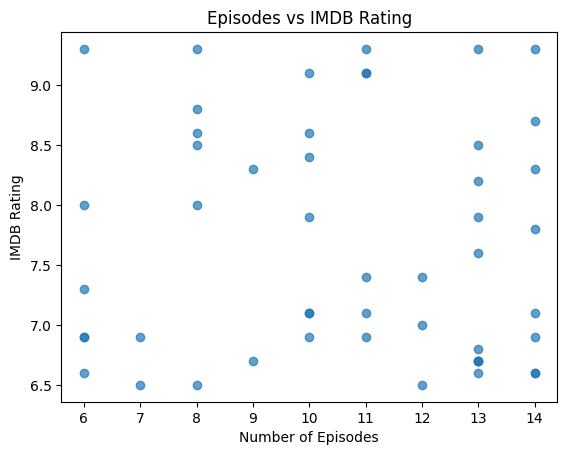

In [ ]:
plt.scatter(df['Episodes'], df['IMDB Rating'], alpha=0.7)
plt.xlabel('Number of Episodes')
plt.ylabel('IMDB Rating')
plt.title('Episodes vs IMDB Rating')
plt.show()

Task 6 : Platform vs Genre Avg Rating (Heatmap)



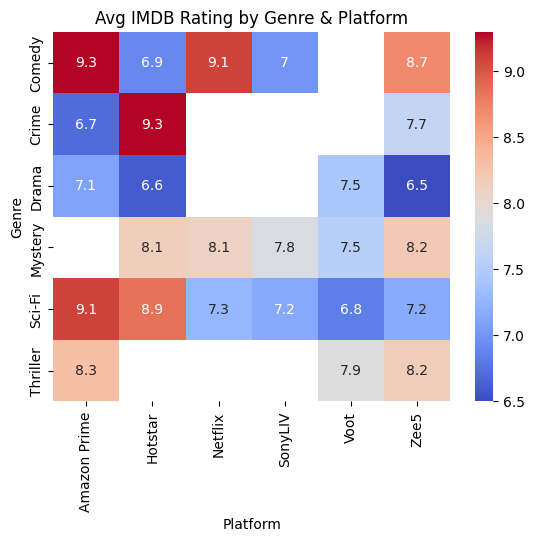

In [ ]:
pivot = df.pivot_table(values='IMDB Rating', index='Genre', columns='Platform', aggfunc='mean')
sns.heatmap(pivot, annot=True, cmap='coolwarm')
plt.title('Avg IMDB Rating by Genre & Platform')
plt.show()

Task 7 : Episodes Per Season (Bar Chart)

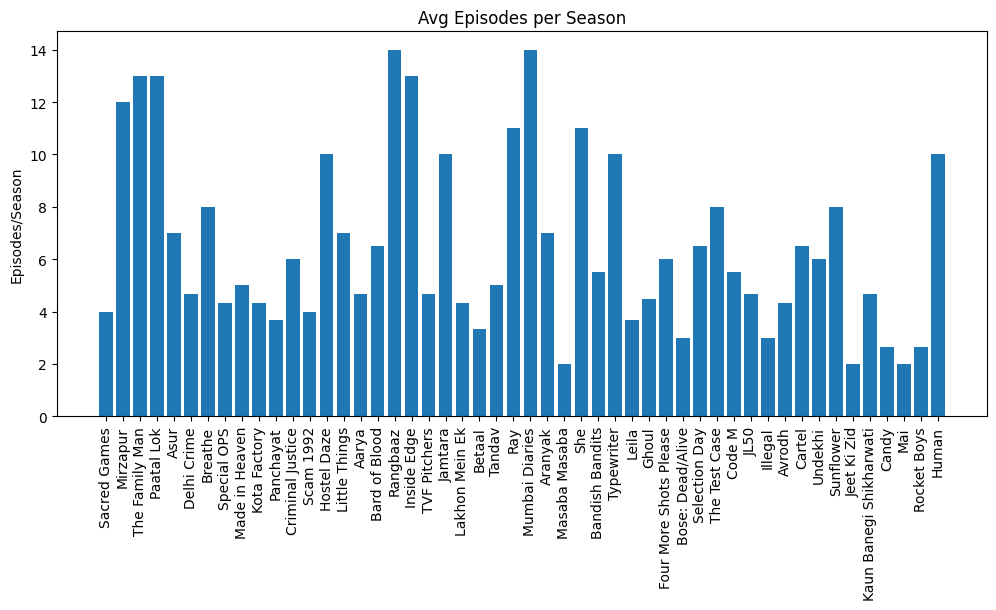

In [ ]:
df['Episodes_per_Season'] = df['Episodes'] / df['Seasons']
plt.figure(figsize=(12,5))
plt.bar(df['Title'], df['Episodes_per_Season'])
plt.xticks(rotation=90)
plt.title('Avg Episodes per Season')
plt.ylabel('Episodes/Season')
plt.show()

Task 8: Seasons vs Rating (Grouped by Platform)

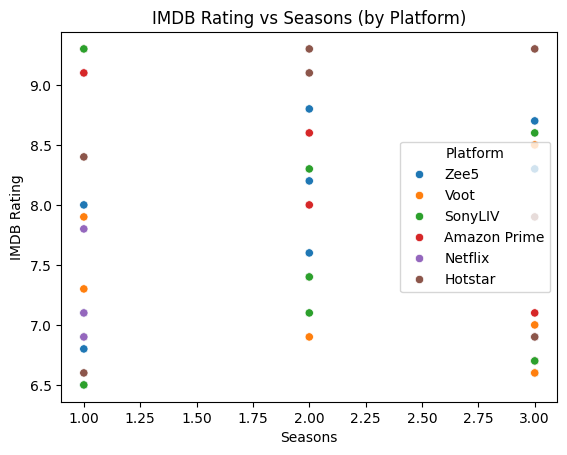

In [ ]:
sns.scatterplot(data=df, x='Seasons', y='IMDB Rating', hue='Platform')
plt.title('IMDB Rating vs Seasons (by Platform)')
plt.show()

Task 9: Most Consistent Genre (Lowest Variance)

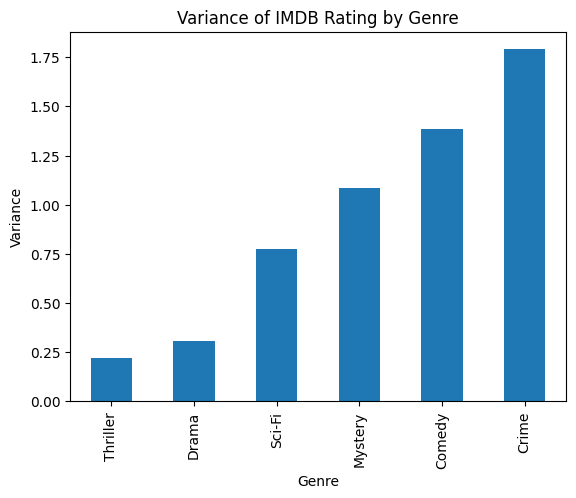

In [ ]:
genre_var = df.groupby('Genre')['IMDB Rating'].var().sort_values()
genre_var.plot(kind='bar')
plt.title('Variance of IMDB Rating by Genre')
plt.ylabel('Variance')
plt.show()

Task 10: Above-Average Rated Series in Each Genre

In [ ]:
genre_avg = df.groupby('Genre')['IMDB Rating'].mean().to_dict()
df['Genre Avg'] = df['Genre'].map(genre_avg)
filtered = df[df['IMDB Rating'] > df['Genre Avg']]
filtered[['Title', 'Genre', 'IMDB Rating', 'Genre Avg']]

,Title,Genre,IMDB Rating,Genre Avg
0,Sacred Games,Crime,8.8,7.600000
3,Paatal Lok,Drama,7.9,7.020000
8,Made in Heaven,Thriller,8.6,8.116667
9,Kota Factory,Mystery,8.5,7.941667
10,Panchayat,Drama,7.1,7.020000
11,Criminal Justice,Mystery,9.3,7.941667
13,Hostel Daze,Sci-Fi,8.4,7.450000
15,Aarya,Thriller,8.3,8.116667
16,Bard of Blood,Mystery,8.2,7.941667
17,Rangbaaz,Sci-Fi,7.8,7.450000
